<a href="https://colab.research.google.com/github/surajjorwar/Mobile-price-prediction-/blob/main/Mobile_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display, Image

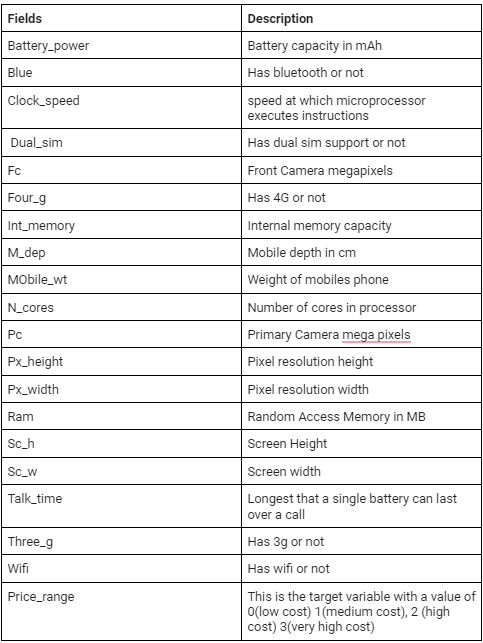

In [149]:
Image('https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/Classification_Mobile_Price_Range_Prediction_f0084ac835.png')


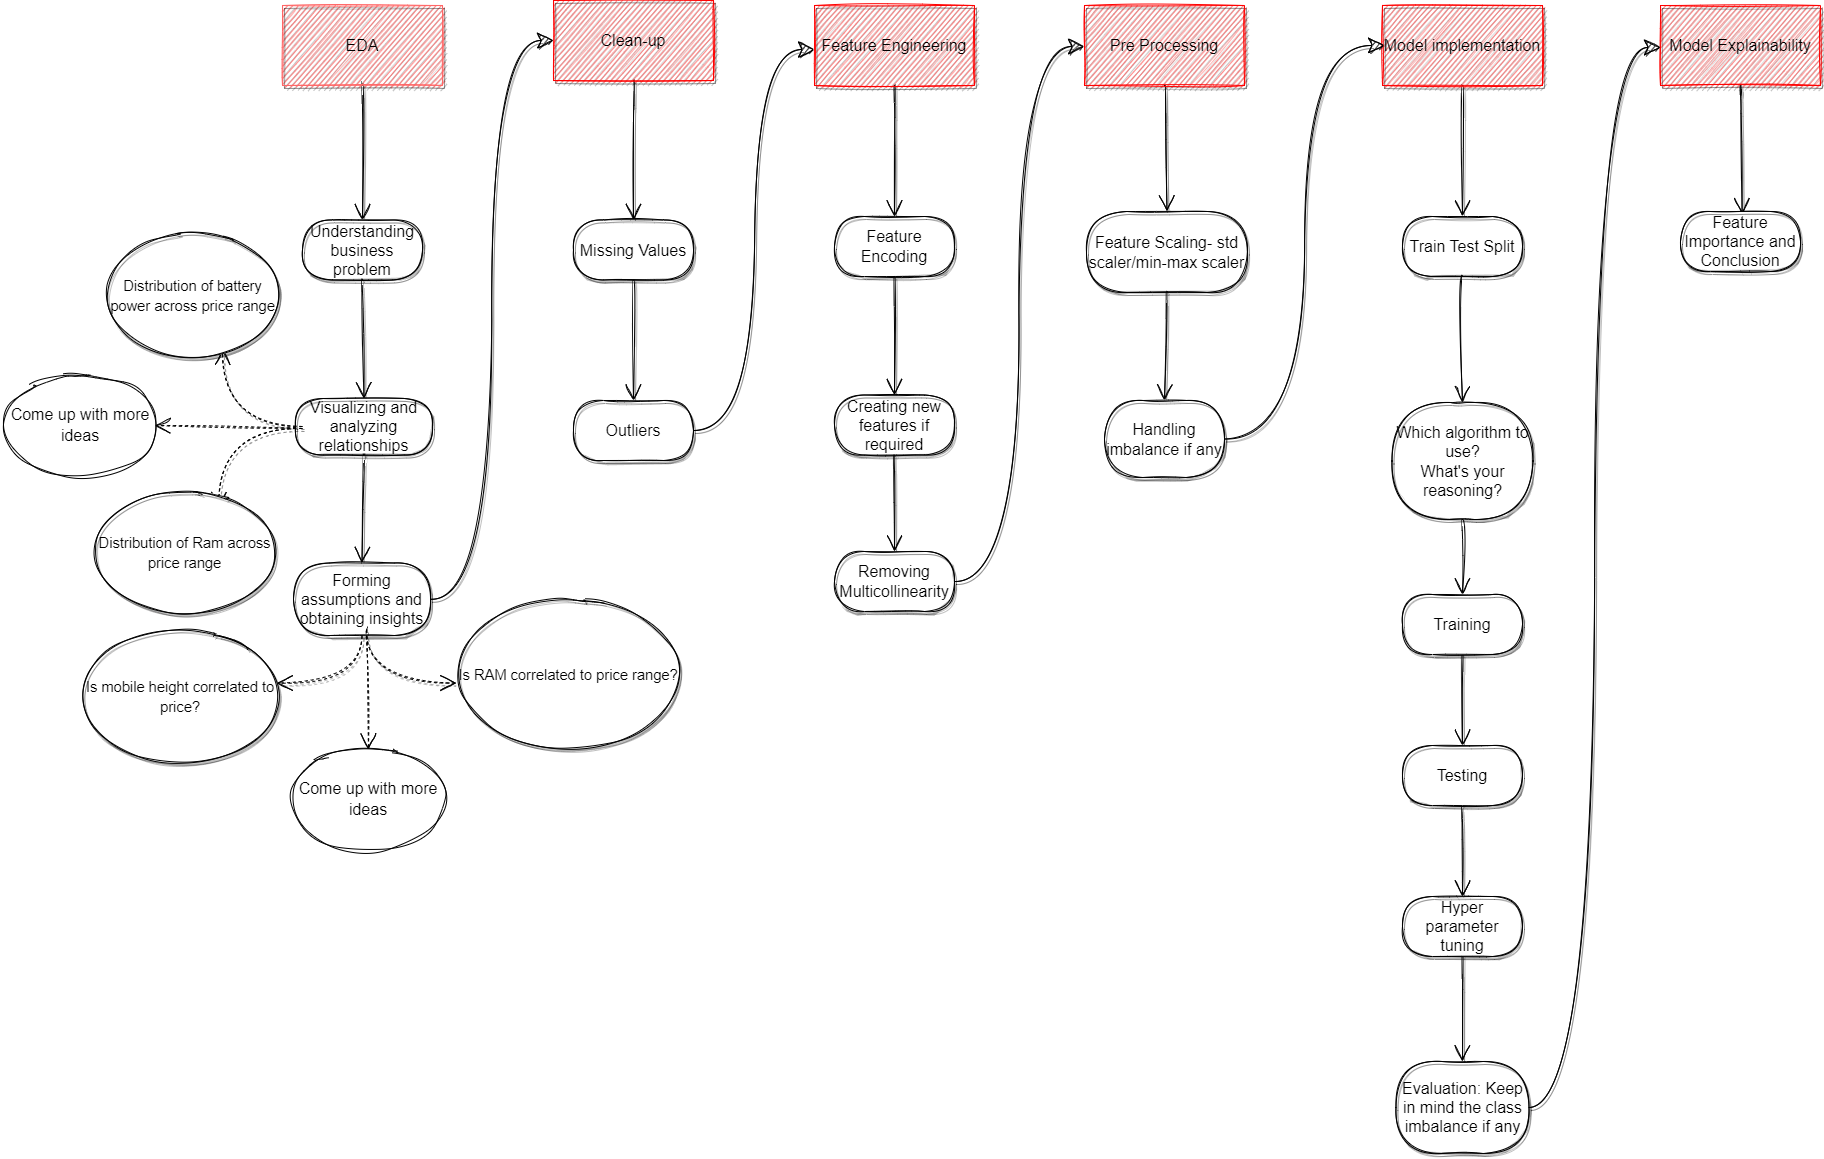

In [150]:
Image('https://ab-strapi-qa.s3.ap-south-1.amazonaws.com/mobi_price_range_fe984c2b3a.png')

In [151]:
df = pd.read_csv('/content/drive/MyDrive/Mobile-price-prediction/data_mobile_price_range.csv')

In [152]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# VISUALIZING AND ANALYZING RELATIONSHIPS

## 1 - Distributon  of battery power accorss price range

In [153]:
#checking unique values in  price_range
df['price_range'].unique()

array([1, 2, 3, 0])

In [154]:
#checking the distribution of data with price_range catogory
df.groupby('price_range')['price_range'].count()

price_range
0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [155]:
#taking mean value of battery_power W.R.T price range
PR_BP = df.groupby('price_range')['battery_power'].mean().reset_index()


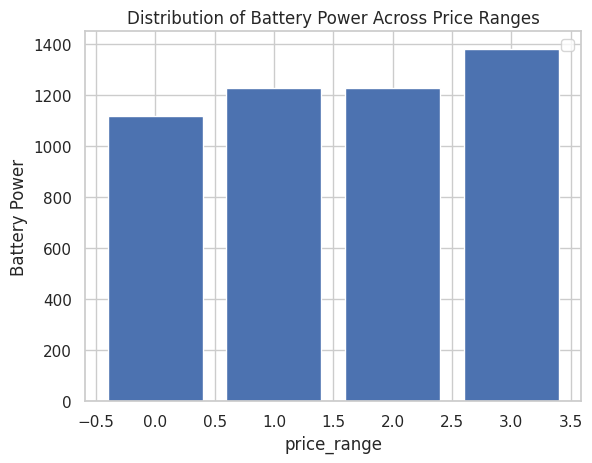

In [156]:
#visualizing  mean of battery power accross price rage
plt.bar(PR_BP['price_range'],PR_BP['battery_power'])
plt.xlabel('price_range')
plt.ylabel('Battery Power')
plt.title('Distribution of Battery Power Across Price Ranges')
plt.legend()

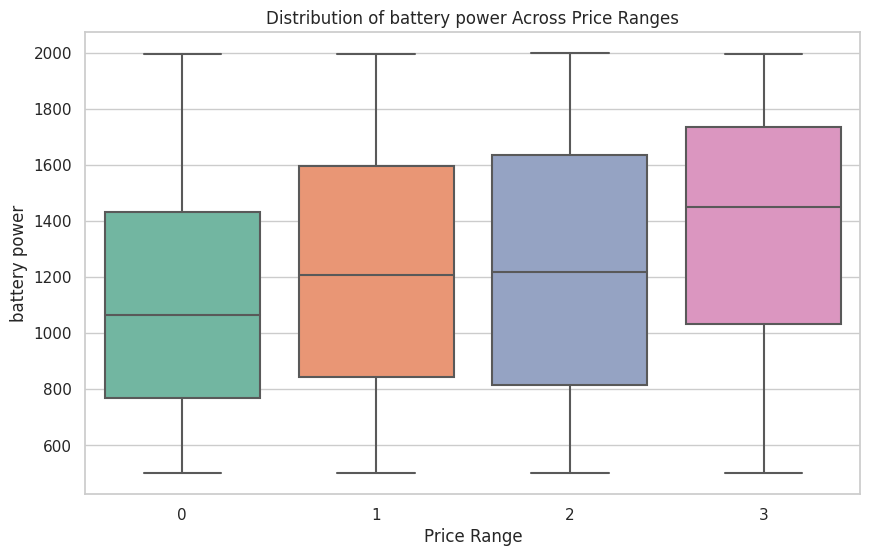

In [157]:
data = df
x = df['price_range']
y = df['battery_power']

plt.figure(figsize=(10, 6))
sns.boxplot(x=x, y=y, data=data, palette="Set2")
plt.title("Distribution of battery power Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("battery power")
plt.show()

c

their are no outliers in battery power

In [158]:
correlation_matrix = df.corr()
import numpy as np
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and the p-value
correlation_coefficient, p_value = pearsonr(df['battery_power'], df['price_range'])

print("Pearson Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson Correlation Coefficient: 0.20072261211373096
p-value: 1.2648542392222364e-19


# **Visualizing the correlation between battery Power and price range **

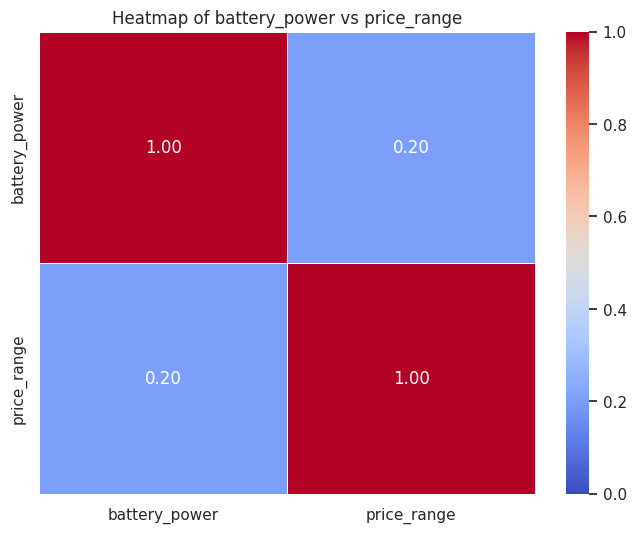

In [159]:
#plotting heat map
data = df[['battery_power','price_range']]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, vmin=0, vmax=1)
plt.title("Heatmap of battery_power vs price_range")
plt.show()

## **These two variables shows weak positive relation  it is positive but its too weak to be considered **

##2 -Distribution of ram accross price range

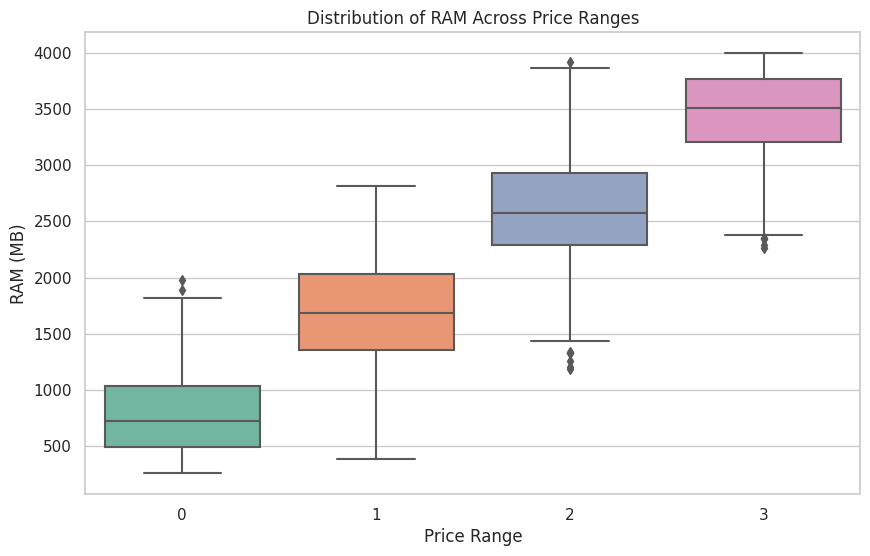

In [161]:
#Distribution of RAM Across Price Ranges
data = df
x = df['price_range']
y = df['ram']

plt.figure(figsize=(10, 6))
sns.boxplot(x=x, y=y, data=data, palette="Set2")
plt.title("Distribution of RAM Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("RAM (MB)")
plt.show()

# **we can clearly see the relation of ram and price range and also their are outliers in ram variable  **

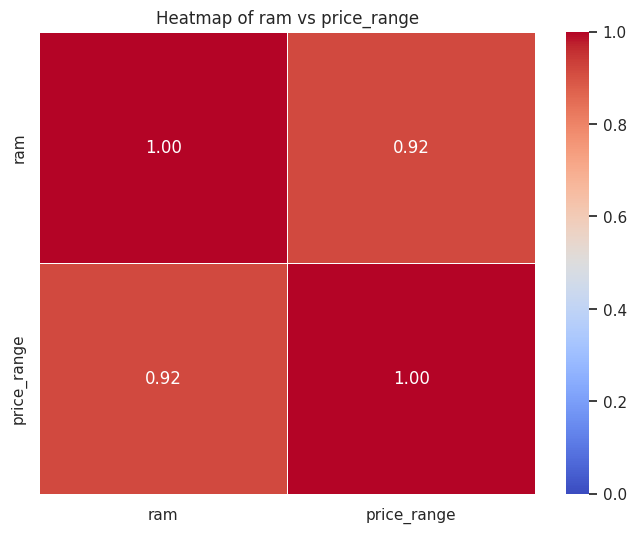

In [167]:
#plotting  Heatmap of ram vs price_range
data = df[['ram','price_range']]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, vmin=0, vmax=1)
plt.title("Heatmap of ram vs price_range")
plt.show()

ram shows positive high correlation with price range it is one of the very important variable in this data set

## 3 - highly correlated  variables

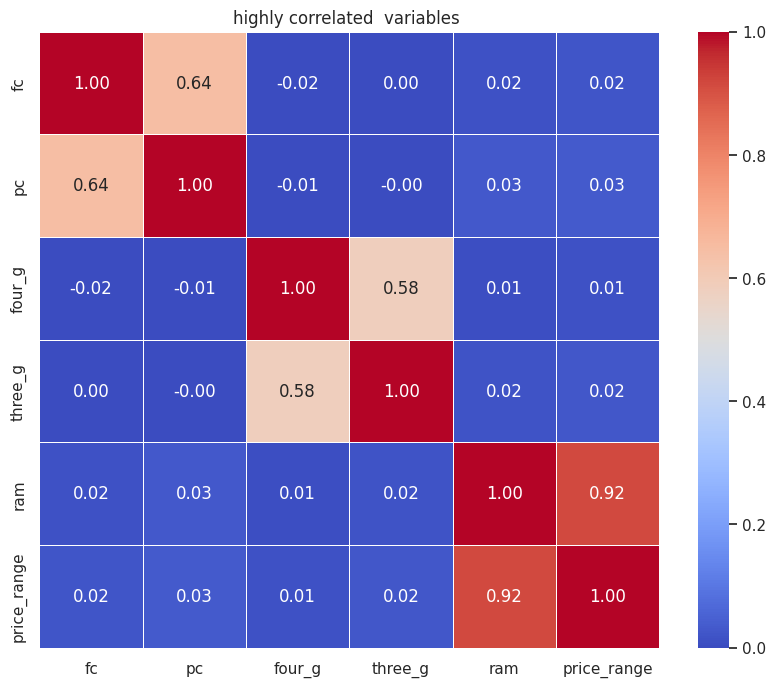

In [162]:
#plotting heat map for highly correlated  variables
data = df[['fc','pc','four_g','three_g','ram','price_range']]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, vmin=0, vmax=1)
plt.title("highly correlated  variables ")
plt.show()

theese are the highly correlated variables
correlation of [fc---->pc = 0.64] ;correlation of [four_g---->three_g = 0.58] ;
correlation of [ram---->price_range = 0.92]



## **Data cleaning **

In [163]:
#checking the null values in the dataframe
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# **Checking outliers with respect to price range **

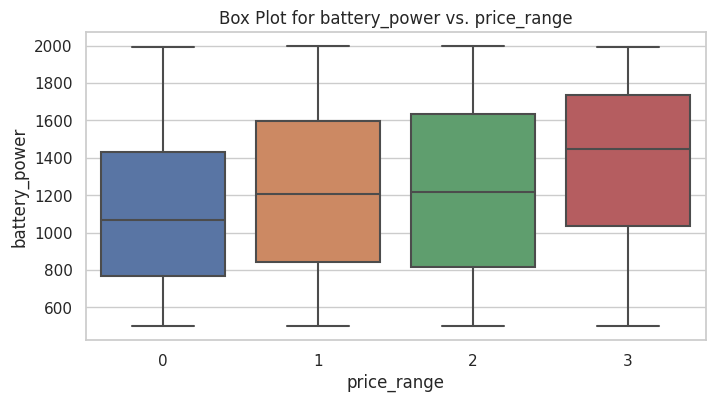

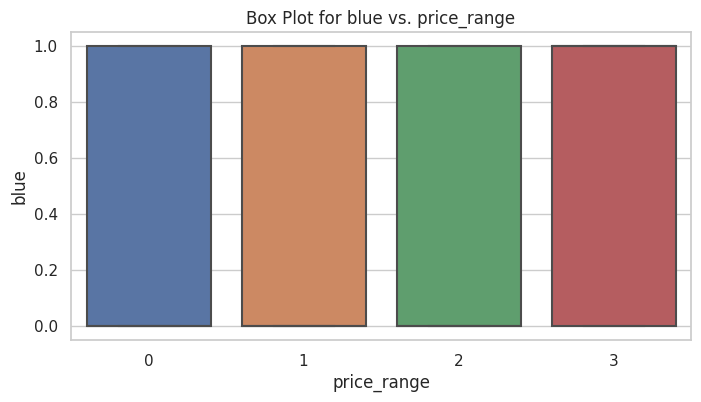

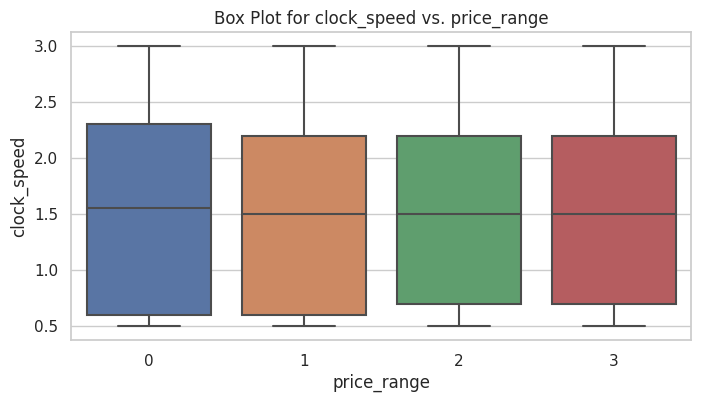

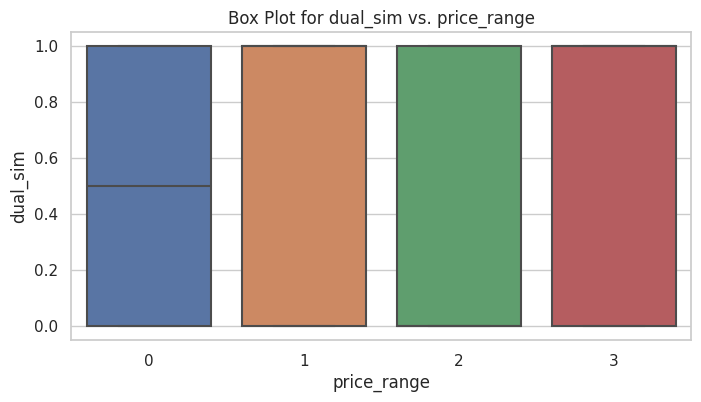

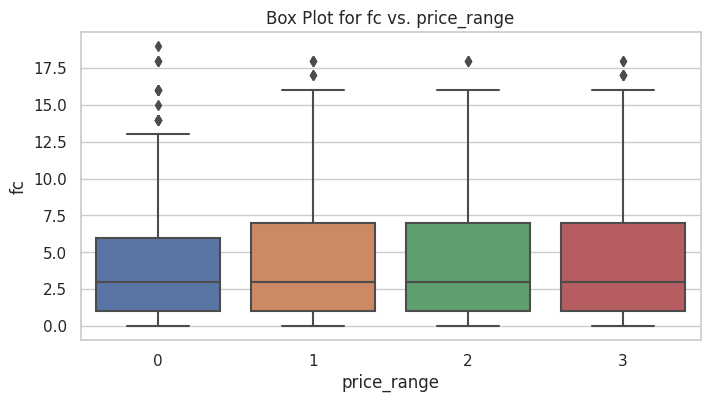

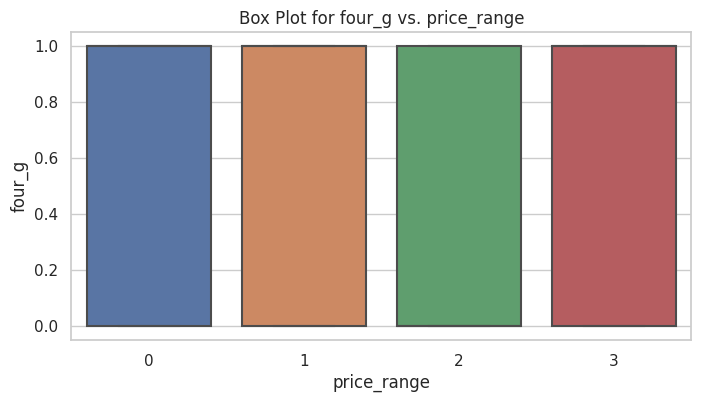

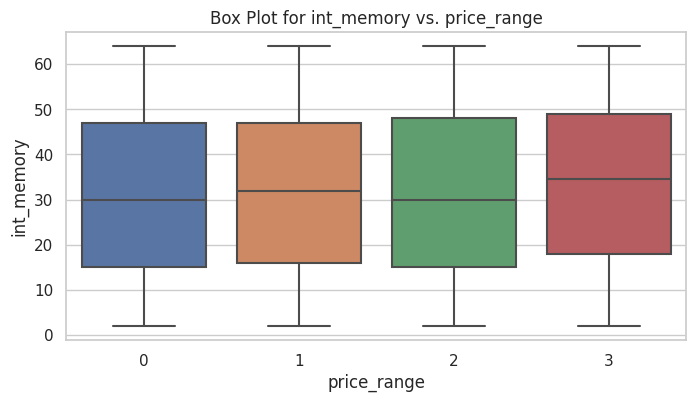

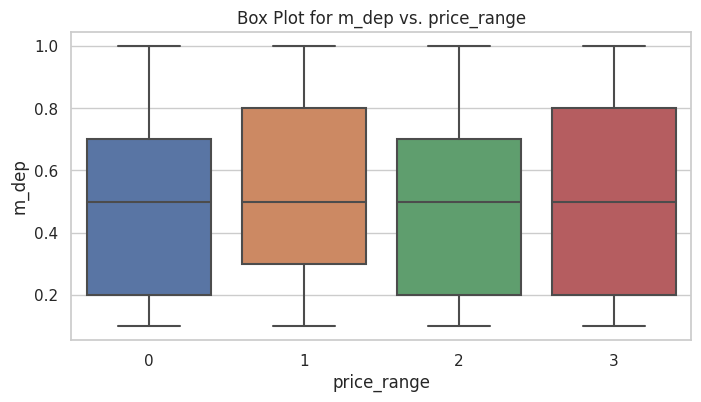

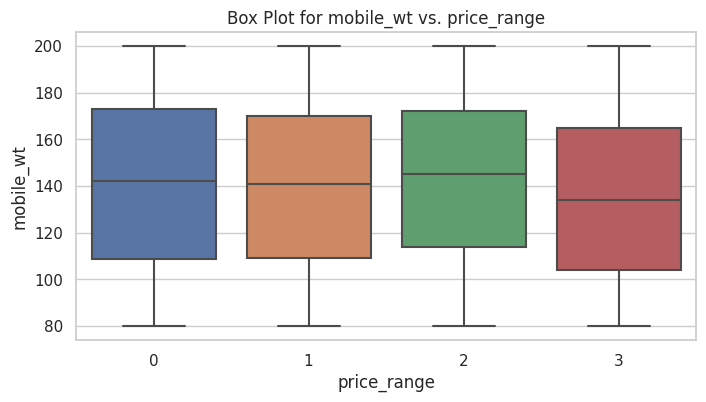

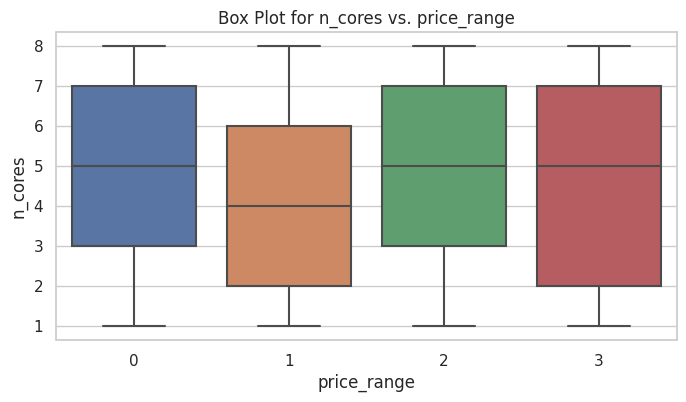

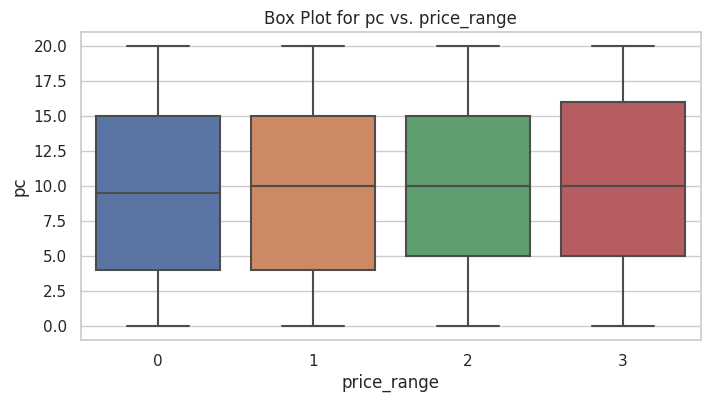

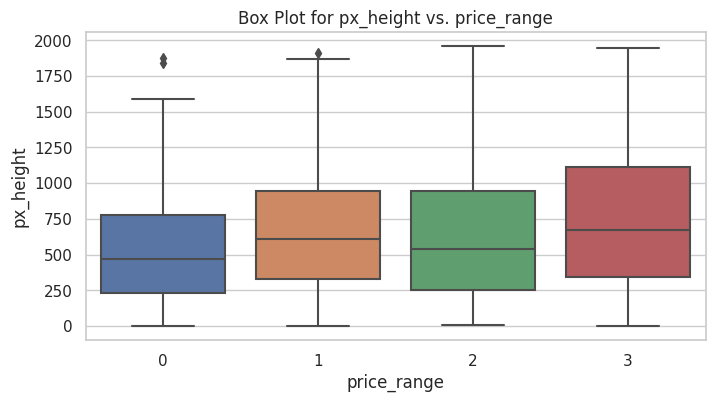

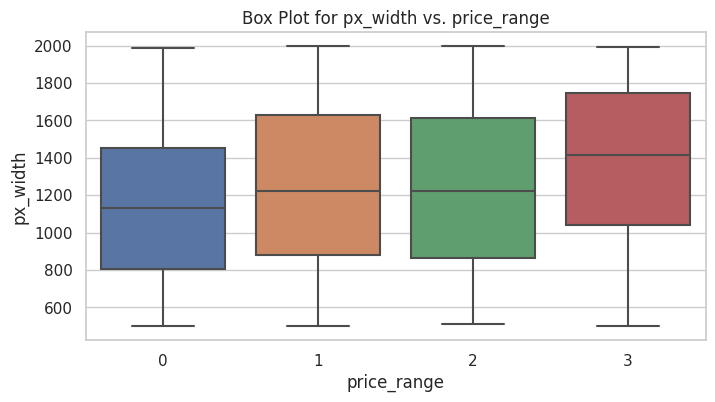

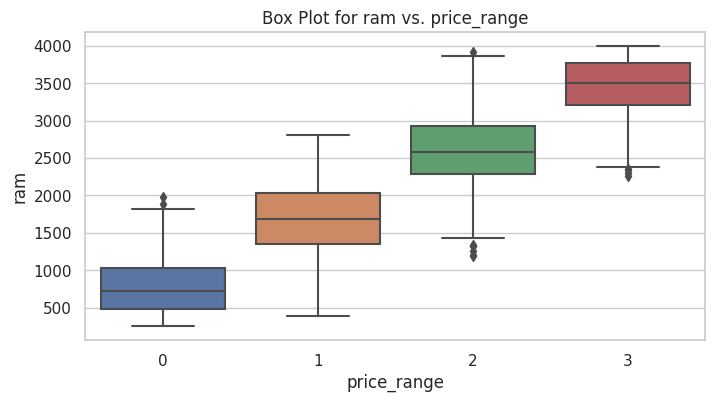

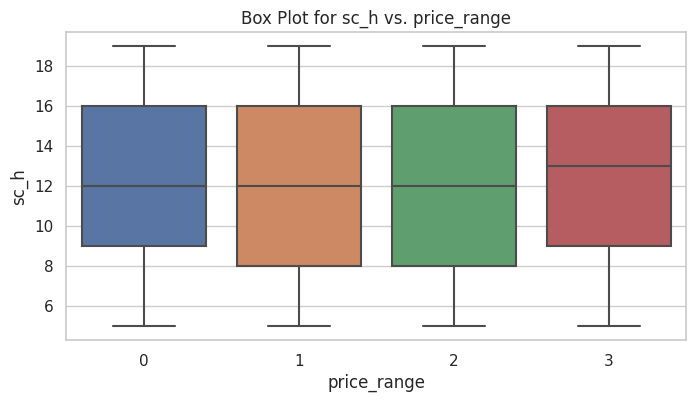

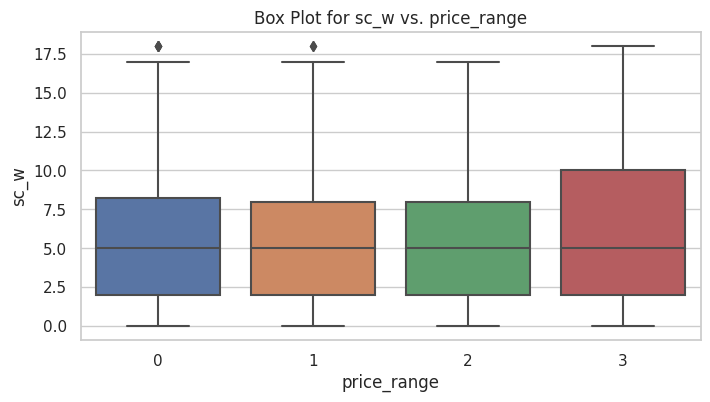

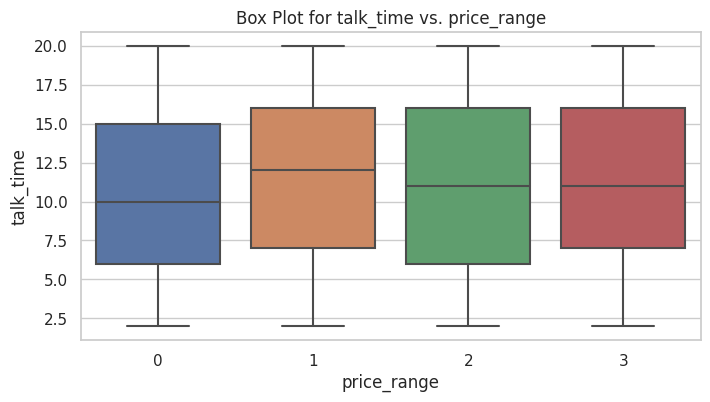

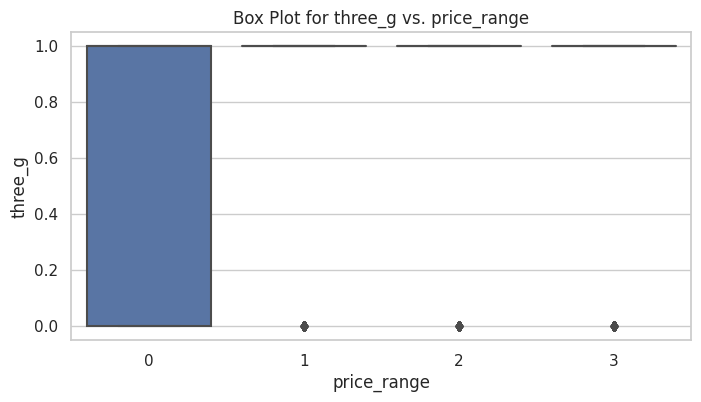

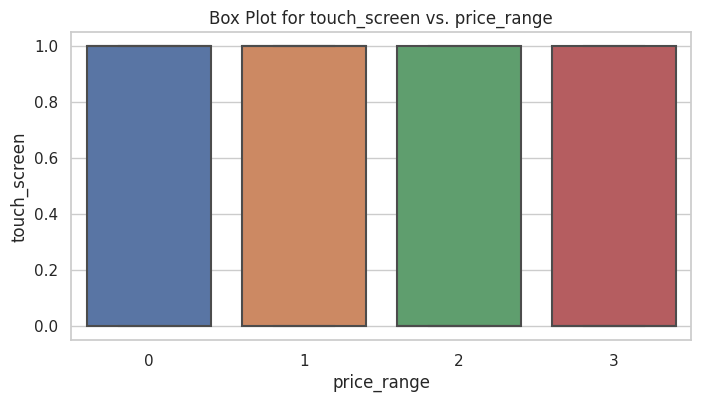

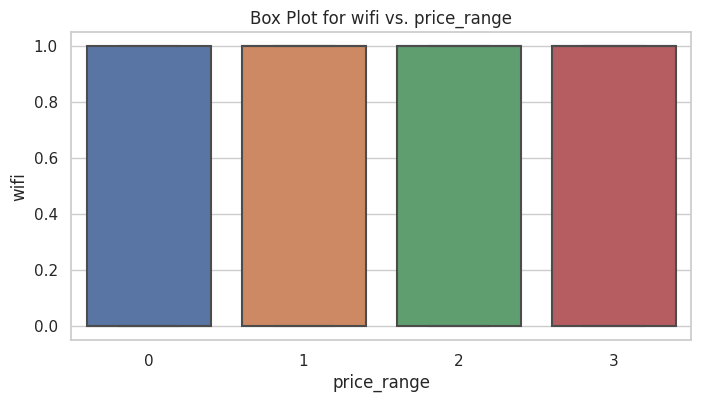

In [164]:
# Create box plots for each feature with respect to "price_range"
for column in df.columns:
    if column != "price_range":
        plt.figure(figsize=(8, 4))
        sns.boxplot(x="price_range", y=column, data=df)
        plt.title(f'Box Plot for {column} vs. price_range')
        plt.show()

## **their are outliers in fc ,px_height,ram,sc_w,three_g
three_g contains binary values  and not continous numerical values so outliers shown in three_g vs price_range using IQR methods are incorrect thats why we are not considering it as outliers **

## **Removing outliers  from these variables **

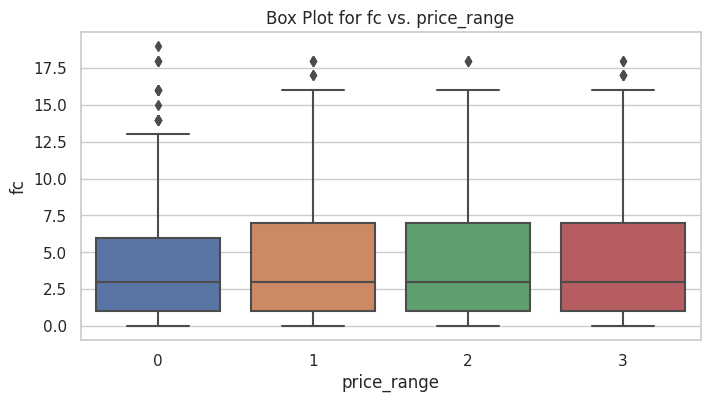

In [165]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="price_range", y="fc", data=df)
plt.title(f'Box Plot for fc vs. price_range')
plt.show()

In [166]:
#splitting data according to price_range categories  ct0 = price_range 0
data = df
ct0 = data[data['price_range']==0]
ct1 = data[data['price_range']==1]
ct2 = data[data['price_range']==2]
ct3 = data[data['price_range']==3]

#creating a function  to remove outliers
def remove_outliers(data):
  for colm in  ['ram','fc','px_height','sc_w']:
    q1= data[colm].quantile(0.25)
    q3= data[colm].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    data =  data[(data[colm] >= lower_bound) & (data[colm] <= upper_bound)]
  return data

#removing outliers from 'ram','fc','px_height','sc_w' colimns

cleaned_ct0 = remove_outliers(ct0)
cleaned_ct1 = remove_outliers(ct1)
cleaned_ct2 = remove_outliers(ct2)
cleaned_ct3 = remove_outliers(ct3)
dff= pd.concat([cleaned_ct0 , cleaned_ct1 , cleaned_ct2 , cleaned_ct3])
dff.shape



(1950, 21)